<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in the city of Toronto</font></h1>

## Introduction

In this notebook I used Google geocoder to get the latitudes and logitudes from postal codes. Also, I used Foursquare API to **explore** the most common venue categories in each neighborhood of Toronto city and then use this feature to group the neighborhoods into clusters. I used **K-Means** clustering algorithm to complete this task. Finally, I used the Folium library to visualize the neighborhoods in Toronto City and their emerging clusters.

## Table of Contents


<font size = 3>

1. <a href="#item1">Introduction</a>

2. <a href="#item2">Data sets</a>

3. <a href="#item3">Methodology</a>

4. <a href="#item4">Analysis and Machine Learning</a>

5. <a href="#item5">Results</a>    
</font>


## 1. Introduction

Toronto City is the most populous city in Canada. The diverse population of Toronto reflects its current and historical role as an important destination for immigrants to Canada

As quoted in an article - What Food Tells Us About Culture
"Traditional cuisine is passed down from one generation to the next. It also operates as an expression of cultural identity. Immigrants bring the food of their countries with them wherever they go and cooking traditional food is a way of preserving their culture when they move to new places."

Undoubtedly, Food Diversity is an important part of an ethnically diverse metropolis. The idea of this project is to categorically segment the neighborhoods of Toronto City into major clusters and examine their cuisines. A desirable intention is to examine the neighborhood cluster's food habits and taste. Further examination might reveal if food has any relationship with the diversity of a neighborhood.

This project will help to understand the diversity of a neighborhood by leveraging venue data from Foursquare’s ‘Places API’ and ‘k-means clustering’ machine learning algorithm. Exploratory Data Analysis (EDA) will help to discover further about the culture and diversity of the neighborhood.
Stakeholders would be the one who are interested to use this quantifiable analysis to understand the distribution of different cultures and cuisines over one of the most diverse cities - Toronto". Also, this project can be utilized by a new food vendor who is willing to open his or her restaurant. Or by a government authority to examine and study their city's culture diversity better.

## 2. Data
The following data sources will be used for this project

1. Toronto city dataset
   - Link: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
   - Description: This page has a table that lists all the postal codes of Canada in html file
   - Link: http://cocl.us/Geospatial_data
   - Description: This link has geographical coordinates of each postal code
2. Foursquare API
   - Link: https://developer.foursquare.com/docs
   - Description: Foursquare API, a location data provider, will be used to make RESTful API calls to retrieve data about venues in different neighborhoods. This is the link to Foursquare Venue Category Hierarchy. Venues retrieved from all the neighborhoods are categorized broadly into "Arts & Entertainment", "College & University", "Event", "Food", "Nightlife Spot", "Outdoors & Recreation", etc.


## 3. Methodology

Import all relevant libraries

In [1]:
import numpy as np   # library to handle data in a vectorized manner

import pandas as pd  # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from bs4 import BeautifulSoup  # library to parse html and xml files(web scraping)
import requests   # library to handle requests
!pip install geocoder
from geopy.geocoders import Nominatim   #to convert address to latitudes and longitudes
from pandas.io.json import json_normalize   #covert json file to pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium     #map rendering library 

from sklearn.cluster import KMeans
from collections import Counter  #determine count in clusters


### Load and explore the data

In [2]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
response = requests.get(wiki_url)  #send request to website and return html of the website
soup = BeautifulSoup(response.text,'html.parser')
print(soup.prettify())  #view how tags are listed in the document

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"e50227f2-4604-469f-93b8-c07397397ba5","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":960187814,"wgRevisionId":960187814,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toron

In [3]:
postal_codes_table = soup.find('table',{'class':'wikitable sortable'})
df=pd.read_html(str(postal_codes_table))[0] 
df.head()  #postal codes of canada


,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [4]:
# filter the dataframe 
df = df[df['Borough']!= 'Not assigned']
df

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [5]:
#to know number of rows and columns in df
df.shape

(103, 3)

In [6]:
#read in the csv file of geographical coordinates of respective postal codes
latlng_df=pd.read_csv('Geospatial_Coordinates.csv')
latlng_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [7]:
#merging 2 dataframes
final_df=pd.merge(df,latlng_df,on='Postal Code')
final_df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [8]:
print('the data frame has {} boroughs'.format(len(final_df['Borough'].unique())))

the data frame has 10 boroughs


In [9]:
final_df['Borough'].unique()

array(['North York', 'Downtown Toronto', 'Etobicoke', 'Scarborough',
       'East York', 'York', 'East Toronto', 'West Toronto',
       'Central Toronto', 'Mississauga'], dtype=object)

In [10]:
#filter the dataframe that contains only 'Borough'=Toronto and reset index
Toronto_df = final_df[final_df['Borough'].str.contains("Toronto")].reset_index(drop=True)
Toronto_df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


#### Use geopy library to get the latitude and longitude values of Toronto City.

In [11]:
address= 'Toronto, ON'
location=Nominatim(user_agent="Toronto_explorer").geocode(address)
lat=location.latitude
lng=location.longitude
print("Geographical coordinates of Toronto are {},{}".format(lat,lng))


Geographical coordinates of Toronto are 43.6534817,-79.3839347


### Create a map of Toronto with neighborhoods superimposed on top using folium

In [12]:
# create map of New York using latitude and longitude values
Toronto_map=folium.Map(location=[lat,lng],zoom_start=12)
folium.CircleMarker([lat,lng],popup='Toronto',color='red',fill=True,fill_color='red',radius=10).add_to(Toronto_map)

# add markers to map
for lat, lng, borough, neighborhood in zip(Toronto_df['Latitude'], Toronto_df['Longitude'], Toronto_df['Borough'], Toronto_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat,lng],radius=5,color='blue',popup=label,fill=True,fill_color='blue',fill_opacity=0.7,parse_html=False).add_to(Toronto_map)
    
Toronto_map    
    


Folium is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough

### Define Foursquare Credentials and Version
Utilizing the Foursquare API to explore the neighborhoods and segment them

In [13]:
CLIENT_ID = 'QXIYACCHLIXHZMZIU0CC12RCCCNJPLUNRUAWUOTDXZH1GPC1'
CLIENT_SECRET= 'KUPEDLOCVZXRFD4BPC4U54NEY1GYZE5FUPVHRH5J4IWRH44T'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QXIYACCHLIXHZMZIU0CC12RCCCNJPLUNRUAWUOTDXZH1GPC1
CLIENT_SECRET:KUPEDLOCVZXRFD4BPC4U54NEY1GYZE5FUPVHRH5J4IWRH44T


### Fetch Foursquare Venue Category Hierarchy 

In [14]:

url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION)
categories_results = requests.get(url).json()
categories_results

{'meta': {'code': 200, 'requestId': '5eeff64afb34b5001babcd52'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

In [15]:
#print the list of all categories of venues
category_list = categories_results['response']['categories']
for data in category_list:
    print(data['id'],data['name'])

4d4b7104d754a06370d81259 Arts & Entertainment
4d4b7105d754a06372d81259 College & University
4d4b7105d754a06373d81259 Event
4d4b7105d754a06374d81259 Food
4d4b7105d754a06376d81259 Nightlife Spot
4d4b7105d754a06377d81259 Outdoors & Recreation
4d4b7105d754a06375d81259 Professional & Other Places
4e67e38e036454776db1fb3a Residence
4d4b7105d754a06378d81259 Shop & Service
4d4b7105d754a06379d81259 Travel & Transport


### Food & It's Sub-Categories
Let's create a function to return a dictionary with Ids' & Names of Food & It's Sub-Categories.

In [16]:
# function to flatten a 'parent_id' category, returns all categories if checkParentID = False
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

# this function takes the parent ID and returns 'name' and 'id' of all the sub-categories
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259')
category_dict

{'4d4b7105d754a06374d81259': 'Food',
 '503288ae91d4c4b30a586d67': 'Afghan Restaurant',
 '4bf58dd8d48988d1c8941735': 'African Restaurant',
 '4bf58dd8d48988d10a941735': 'Ethiopian Restaurant',
 '4bf58dd8d48988d14e941735': 'American Restaurant',
 '4bf58dd8d48988d157941735': 'New American Restaurant',
 '4bf58dd8d48988d142941735': 'Asian Restaurant',
 '56aa371be4b08b9a8d573568': 'Burmese Restaurant',
 '52e81612bcbc57f1066b7a03': 'Cambodian Restaurant',
 '4bf58dd8d48988d145941735': 'Chinese Restaurant',
 '52af3a5e3cf9994f4e043bea': 'Anhui Restaurant',
 '52af3a723cf9994f4e043bec': 'Beijing Restaurant',
 '52af3a7c3cf9994f4e043bed': 'Cantonese Restaurant',
 '58daa1558bbb0b01f18ec1d3': 'Cha Chaan Teng',
 '52af3a673cf9994f4e043beb': 'Chinese Aristocrat Restaurant',
 '52af3a903cf9994f4e043bee': 'Chinese Breakfast Place',
 '4bf58dd8d48988d1f5931735': 'Dim Sum Restaurant',
 '52af3a9f3cf9994f4e043bef': 'Dongbei Restaurant',
 '52af3aaa3cf9994f4e043bf0': 'Fujian Restaurant',
 '52af3ab53cf9994f4e043bf1'

Now, we have all the categories in Food with their id's.

### Define a function to explore all the neighborhoods in Toronto

As, our aim is to segment the neighborhoods of Toronto with respect to the Food in its vicinity. We need to loop to fetch this data from all the neighborhood's venues.

- Loop through neighborhoods
  - Create the API request URL with radius=500, LIMIT=100
  - Make the GET request
  - For each neighborhood, return only relevant information for each nearby venue
  - Append all nearby venues to a list
- Unfold the list & append it to dataframe being returned

In [17]:
radius=500
limit=100
category_id= '4d4b7105d754a06374d81259'  #category id for food

The categoryId parameter in the API request URL can be a comma seperated string. So, lets create a comma seperated string from category_dict.

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
toronto_venues = getNearbyVenues(names=Toronto_df['Neighborhood'],
                                   latitudes=Toronto_df['Latitude'],
                                   longitudes=Toronto_df['Longitude']
                                  )

In [20]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub


In [21]:
#Size of dataframe
toronto_venues.shape

(1623, 7)

**Let's find out how many unique categories can be curated from all the returned venues**

In [22]:
print('There are {} unique categories of venues in neighborhoods of Toronto'.format(len(toronto_venues['Venue Category'].unique())))

There are 236 unique categories of venues in neighborhoods of Toronto


In [23]:
#List the unique categories
toronto_venues['Venue Category'].value_counts()

Coffee Shop                        142
Café                                89
Restaurant                          57
Italian Restaurant                  40
Hotel                               37
Park                                35
Bakery                              33
Japanese Restaurant                 32
Pizza Place                         29
Sushi Restaurant                    26
Gym                                 25
Sandwich Place                      24
Bar                                 24
Pub                                 23
American Restaurant                 22
Seafood Restaurant                  21
Clothing Store                      20
Thai Restaurant                     18
Beer Bar                            18
Diner                               17
Ice Cream Shop                      17
Bookstore                           17
Vegetarian / Vegan Restaurant       17
Gastropub                           17
Breakfast Spot                      16
Grocery Store            

As we are interested in exploring the diversity of the neighborhood. Let's remove the generalized categories, like Coffee Shop, Cafe, etc.

In [24]:
# list all the categories
unique_categories = toronto_venues['Venue Category'].unique()
unique_categories

array(['Bakery', 'Coffee Shop', 'Distribution Center', 'Spa', 'Pub',
       'Park', 'Restaurant', 'Breakfast Spot', 'Gym / Fitness Center',
       'Historic Site', 'Farmers Market', 'Performing Arts Venue',
       'Chocolate Shop', 'Dessert Shop', 'French Restaurant', 'Café',
       'Yoga Studio', 'Theater', 'Shoe Store', 'Event Space',
       'Ice Cream Shop', 'Art Gallery', 'Cosmetics Shop',
       'Asian Restaurant', 'Electronics Store', 'Bank', 'Beer Store',
       'Health Food Store', 'Antique Shop', 'Italian Restaurant',
       'Sushi Restaurant', 'Creperie', 'Beer Bar', 'Arts & Crafts Store',
       'Burrito Place', 'Mexican Restaurant', 'Hobby Shop', 'Diner',
       'Fried Chicken Joint', 'Discount Store', 'Smoothie Shop',
       'Sandwich Place', 'Gym', 'Bar', 'College Auditorium', 'Comic Shop',
       'Clothing Store', 'Tea Room', 'Plaza', 'Music Venue',
       'Pizza Place', 'Thai Restaurant', 'Ramen Restaurant',
       'College Rec Center', 'Sporting Goods Shop', 'Steakhous

In [25]:
# manually create a list of generalized categories
general_categories = ['Bakery', 'Coffee Shop', 'Distribution Center', 'Spa', 'Pub','Park', 'Gym / Fitness Center',
                      'Historic Site', 'Farmers Market', 'Performing Arts Venue','Chocolate Shop', 'Dessert Shop', 'Café',
                      'Yoga Studio', 'Theater', 'Shoe Store', 'Event Space','Ice Cream Shop', 'Art Gallery', 'Cosmetics Shop',
                      'Electronics Store', 'Bank', 'Beer Store','Health Food Store', 'Antique Shop', 'Creperie', 'Beer Bar', 
                      'Arts & Crafts Store', 'Hobby Shop', 'Diner', 'Discount Store',
                      'Smoothie Shop','Sandwich Place', 'Gym', 'Bar', 'College Auditorium', 'Comic Shop','Clothing Store', 
                      'Tea Room', 'Plaza', 'Music Venue','Pizza Place','College Rec Center', 'Sporting Goods Shop', 'Steakhouse',
                      'Shopping Mall', 'Tanning Salon', 'Hotel', 'Burger Joint','Miscellaneous Shop', 'Gastropub', 'Bookstore', 'Lake', 
                      'Lounge', 'Furniture / Home Store', 'Bubble Tea Shop','Other Great Outdoors', 'Department Store', 'Poutine Place',
                      'Lingerie Store', 'Hookah Bar', 'Movie Theater', 'Office','Wine Bar', 'Smoke Shop', 'Video Game Store', 'Food Truck', 
                      'Church', 'Poke Place','BBQ Joint', 'Cocktail Bar', 'Jazz Club', 'Camera Store', 'Fountain', 'Tailor Shop',
                      'Grocery Store', 'Fish Market','Salon / Barbershop', 'Irish Pub', 'Pharmacy', 'Bistro', 'Trail','Neighborhood',
                      'Liquor Store', 'Concert Hall', 'Museum','Basketball Stadium', 'Beach', 'Cheese Shop','Gourmet Shop',
                      'Bagel Shop','Juice Bar', 'Art Museum','Salad Place', 'Donut Shop','Candy Store', 'Baby Store', 'Nightclub',
                      'Athletics & Sports', 'Speakeasy', 'Opera House', 'General Travel','Monument / Landmark','Deli / Bodega', 
                      "Women's Store",'Building', 'Cupcake Shop','Gift Shop', 'Soup Place', 'Brewery', 'Supermarket', 'Pet Store',
                      'Wine Shop', 'Skating Rink','IT Services', 'Roof Deck', 'Aquarium', 'Dance Studio','Train Station', 
                      'Scenic Lookout', 'Baseball Stadium','History Museum', 'Sports Bar', 'Convenience Store','Convention Center',
                      'Indie Movie Theater','Hotel Bar', 'Record Shop',"Men's Store", 'Dog Run',
                      'Fruit & Vegetable Store','Frozen Yogurt Shop', 'General Entertainment', 'Taco Place', 'Climbing Gym',
                      'Stadium', 'Intersection','Board Shop', 'Gay Bar', 'Stationery Store', 'Coworking Space',
                      'Swim School', 'Bus Line', 'Garden','Jewelry Store', 'Flea Market','Rental Car Location',
                      'Toy / Game Store', 'Gas Station','College Gym', 'College Arts Building','Tennis Court',
                      'Playground', 'Organic Grocery','Gaming Cafe','Hospital','Bed & Breakfast', 'Snack Place', 'Light Rail Station',
                      'Airport','Airport Lounge', 'Harbor / Marina', 'Airport Food Court','Airport Terminal', 'Airport Gate', 
                      'Boutique', 'Airport Service','Sculpture Garden', 'Boat or Ferry','Optical Shop', 'Hostel', 'Butcher',
                      'Market','Flower Shop', 'Martial Arts Dojo', 'Sake Bar','Health & Beauty Service', 'Strip Club',
                      'Skate Park', 'Garden Center', 'Auto Workshop', 'Recording Studio']

In [26]:
# fetch all the required food categories
food_categories =  list(set(unique_categories) - set(general_categories))
food_categories


['Food Court',
 'Taiwanese Restaurant',
 'American Restaurant',
 'Burrito Place',
 'Vietnamese Restaurant',
 'Filipino Restaurant',
 'Middle Eastern Restaurant',
 'Ramen Restaurant',
 'Eastern European Restaurant',
 'Latin American Restaurant',
 'French Restaurant',
 'Italian Restaurant',
 'Seafood Restaurant',
 'Gluten-free Restaurant',
 'Theme Restaurant',
 'Malay Restaurant',
 'Asian Restaurant',
 'Colombian Restaurant',
 'New American Restaurant',
 'Molecular Gastronomy Restaurant',
 'Dim Sum Restaurant',
 'Mediterranean Restaurant',
 'Sushi Restaurant',
 'Restaurant',
 'Afghan Restaurant',
 'Fried Chicken Joint',
 'Portuguese Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Brazilian Restaurant',
 'German Restaurant',
 'Cajun / Creole Restaurant',
 'Modern European Restaurant',
 'Chinese Restaurant',
 'Moroccan Restaurant',
 'Thai Restaurant',
 'Japanese Restaurant',
 'Indian Restaurant',
 'Korean Restaurant',
 'Noodle House',
 'Breakfast Spot',
 'Fish & Chips Shop',
 'Caribbean R

In [27]:
toronto_venues = toronto_venues[toronto_venues['Venue Category'].isin(food_categories)].reset_index(drop=True)
toronto_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
1,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
2,"Regent Park, Harbourfront",43.65426,-79.360636,Figs Breakfast & Lunch,43.655675,-79.364503,Breakfast Spot
3,"Regent Park, Harbourfront",43.65426,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant
4,"Regent Park, Harbourfront",43.65426,-79.360636,Izumi,43.649970,-79.360153,Asian Restaurant


In [28]:
#to count no. of food categories
print('There are {} unique food categories of venues'.format(toronto_venues['Venue Category'].nunique()))

There are 54 unique food categories of venues


In [29]:
toronto_venues.shape

(426, 7)

In [30]:
print('There are {} unique food categories of venues'.format(toronto_venues['Venue'].nunique()))

There are 302 unique food categories of venues


### Analyse each neighborhood

In [31]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot.head()

,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Breakfast Spot,Burrito Place,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
toronto_onehot.shape

(426, 54)

In [33]:
# add neighborhood column to the first column of toronto_onehot
Neighborhood = toronto_venues['Neighborhood']
toronto_onehot.insert(0, 'Neighborhood', Neighborhood)

toronto_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Breakfast Spot,Burrito Place,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's count venues of each category in each neighborhood

In [34]:
venue_count=toronto_onehot.groupby('Neighborhood').sum()
venue_count

,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Breakfast Spot,Burrito Place,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Berczy Park,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,0,0,1,0,1,0
"Brockton, Parkdale Village, Exhibition Place",0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Central Bay Street,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,4,3,1,0,0,0,0,2,1,0,0,0,0,0,1,1,0,1,0,0,2,0,1,0
Christie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Church and Wellesley,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,4,0,0,0,2,1,0,0,0,0,0,0,0,1,3,0,5,0,0,0,1,0,0
"Commerce Court, Victoria Hotel",0,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,3,3,0,1,0,0,0,0,0,0,0,1,0,0,0,7,3,0,0,0,2,0,2,0
Davisville,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,1,0,0,0
Davisville North,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Let's find out the top 10 food categories in Toronto**

In [35]:
venue_count_described = venue_count.describe().transpose()
top10_venue = venue_count_described.sort_values('max', ascending=False)[0:10]
top10_venue

,count,mean,std,min,25%,50%,75%,max
Greek Restaurant,33.0,0.393939,1.412874,0.0,0.0,0.0,0.0,8.0
Restaurant,33.0,1.727273,1.606096,0.0,1.0,1.0,3.0,7.0
Sushi Restaurant,33.0,0.787879,1.082750,0.0,0.0,0.0,1.0,5.0
Italian Restaurant,33.0,1.212121,1.192623,0.0,0.0,1.0,2.0,4.0
American Restaurant,33.0,0.666667,1.136515,0.0,0.0,0.0,1.0,4.0
Japanese Restaurant,33.0,0.969697,1.262063,0.0,0.0,0.0,1.0,4.0
Fried Chicken Joint,33.0,0.181818,0.583874,0.0,0.0,0.0,0.0,3.0
Mexican Restaurant,33.0,0.272727,0.674200,0.0,0.0,0.0,0.0,3.0
Middle Eastern Restaurant,33.0,0.272727,0.674200,0.0,0.0,0.0,0.0,3.0
Seafood Restaurant,33.0,0.636364,1.025249,0.0,0.0,0.0,1.0,3.0


In [36]:
#list of top 10 venues
venue_top10_list = top10_venue.index.values.tolist()
venue_top10_list

['Greek Restaurant',
 'Restaurant',
 'Sushi Restaurant',
 'Italian Restaurant',
 'American Restaurant',
 'Japanese Restaurant',
 'Fried Chicken Joint',
 'Mexican Restaurant',
 'Middle Eastern Restaurant',
 'Seafood Restaurant']

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [37]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()


,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Breakfast Spot,Burrito Place,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Berczy Park,0.0,0.0,0.0,0.0,0.0,0.076923,0.000000,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.076923,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.076923,0.00,0.0,0.076923,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.153846,0.153846,0.076923,0.0,0.0,0.076923,0.0,0.076923,0.0
1,"Brockton, Parkdale Village, Exhibition Place",0.0,0.0,0.0,0.0,0.0,0.400000,0.200000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.2,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.200000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
2,"Business reply mail Processing Centre, South C...",0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.333333,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
3,Central Bay Street,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.05,0.000000,0.0,0.0,0.0,0.0,0.050000,0.0,0.0,0.0,0.000000,0.05,0.2,0.150000,0.05,0.0,0.0,0.0,0.0,0.1,0.05,0.0,0.0,0.0,0.0,0.0,0.05,0.050000,0.000000,0.050000,0.0,0.0,0.100000,0.0,0.050000,0.0
4,Christie,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.5,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.500000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0


First, let's write a function to sort the venues in descending order.

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [39]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berczy Park,Seafood Restaurant,Restaurant,French Restaurant,Thai Restaurant,Comfort Food Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Breakfast Spot,Italian Restaurant,Burrito Place,Restaurant,Vietnamese Restaurant
2,"Business reply mail Processing Centre, South C...",Fast Food Restaurant,Burrito Place,Restaurant,Vietnamese Restaurant,Dim Sum Restaurant
3,Central Bay Street,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
4,Christie,Italian Restaurant,Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Food Court


### Cluster Neighborhoods

**Determine the optimal number of clusters for k-means clustering**

**The Elbow Method** - Calculate the sum of squared distances of samples to their closest cluster center for different values of k. The value of k after which there is no siginificant decrease in sum of squared distances is choosen.

In [40]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

sum_of_squared_distances = []
K = range(1,10)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(toronto_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 

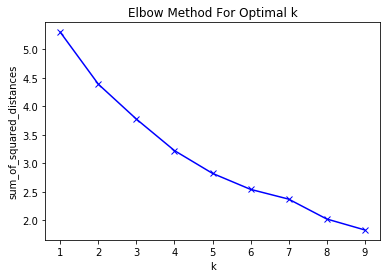

In [41]:
import matplotlib.pyplot as plt
plt.plot(K, sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

Elbow method does not seem to help us to determine the optimal number of clusters. Let's use another method.

**The Silhouette Method** - The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). Source: Wikipedia

In [42]:
from sklearn.metrics import silhouette_score
sil = []
K_sil = range(2,10)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(toronto_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(toronto_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 

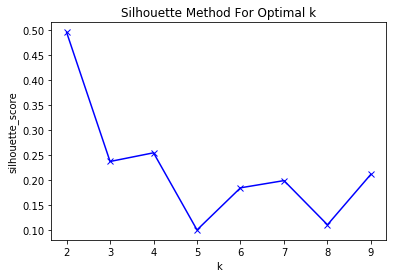

In [43]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

As there is a peak at at k=4, let's set the number of clusters = 4

In [44]:
# set number of clusters
kclusters = 4

kmeans=KMeans(init='k-means++',n_clusters=kclusters,n_init=30).fit(toronto_grouped_clustering)
print(Counter(kmeans.labels_))  #size of clusters

Counter({1: 26, 2: 4, 0: 2, 3: 1})


Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

In [45]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.head(5)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,Berczy Park,Seafood Restaurant,Restaurant,French Restaurant,Thai Restaurant,Comfort Food Restaurant
1,2,"Brockton, Parkdale Village, Exhibition Place",Breakfast Spot,Italian Restaurant,Burrito Place,Restaurant,Vietnamese Restaurant
2,1,"Business reply mail Processing Centre, South C...",Fast Food Restaurant,Burrito Place,Restaurant,Vietnamese Restaurant,Dim Sum Restaurant
3,1,Central Bay Street,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
4,1,Christie,Italian Restaurant,Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Food Court


In [46]:
# merge neighborhoods_venues_sorted with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = neighborhoods_venues_sorted.join(Toronto_df.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.head()


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Postal Code,Borough,Latitude,Longitude
0,1,Berczy Park,Seafood Restaurant,Restaurant,French Restaurant,Thai Restaurant,Comfort Food Restaurant,M5E,Downtown Toronto,43.644771,-79.373306
1,2,"Brockton, Parkdale Village, Exhibition Place",Breakfast Spot,Italian Restaurant,Burrito Place,Restaurant,Vietnamese Restaurant,M6K,West Toronto,43.636847,-79.428191
2,1,"Business reply mail Processing Centre, South C...",Fast Food Restaurant,Burrito Place,Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,M7Y,East Toronto,43.662744,-79.321558
3,1,Central Bay Street,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,M5G,Downtown Toronto,43.657952,-79.387383
4,1,Christie,Italian Restaurant,Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Food Court,M6G,Downtown Toronto,43.669542,-79.422564


Finally, let's visualize the resulting clusters

In [47]:
# create map
lat,lng=43.6534817,-79.3839347  #lats and longs of toronto
map_clusters = folium.Map(location=[lat, lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Results

Now examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, assign a name to each cluster

**Cluster 0**

In [50]:
cluster_0 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[1:7]]
cluster_0.head(5)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,"Dufferin, Dovercourt Village",Portuguese Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Food Court
29,"The Annex, North Midtown, Yorkville",Vegetarian / Vegan Restaurant,Indian Restaurant,Middle Eastern Restaurant,French Restaurant,Food Court


In [53]:
for col in [1,2,3]:
    print(cluster_0.iloc[:,col].value_counts(ascending = False))
    print("---------------------------------------------")

Portuguese Restaurant            1
Vegetarian / Vegan Restaurant    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Middle Eastern Restaurant    1
Indian Restaurant            1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Middle Eastern Restaurant    1
Vietnamese Restaurant        1
Name: 3rd Most Common Venue, dtype: int64
---------------------------------------------


**Cluster 1**

In [54]:
cluster_1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[1:7]]
cluster_1.head(5)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berczy Park,Seafood Restaurant,Restaurant,French Restaurant,Thai Restaurant,Comfort Food Restaurant
2,"Business reply mail Processing Centre, South C...",Fast Food Restaurant,Burrito Place,Restaurant,Vietnamese Restaurant,Dim Sum Restaurant
3,Central Bay Street,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
4,Christie,Italian Restaurant,Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,Food Court
5,Church and Wellesley,Sushi Restaurant,Japanese Restaurant,Restaurant,Mediterranean Restaurant,Burrito Place


In [56]:
for col in [1,2,3]:
    print(cluster_1.iloc[:,col].value_counts(ascending = False))
    print("---------------------------------------------")

Restaurant                   6
Sushi Restaurant             4
Fast Food Restaurant         3
Vietnamese Restaurant        2
American Restaurant          2
Seafood Restaurant           2
Italian Restaurant           2
Fried Chicken Joint          1
Middle Eastern Restaurant    1
Asian Restaurant             1
Thai Restaurant              1
Greek Restaurant             1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Italian Restaurant               6
Restaurant                       5
American Restaurant              3
Japanese Restaurant              3
Vegetarian / Vegan Restaurant    2
Comfort Food Restaurant          1
Fried Chicken Joint              1
Fish & Chips Shop                1
Thai Restaurant                  1
Burrito Place                    1
Seafood Restaurant               1
Mexican Restaurant               1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Restaurant                   5
I

**Cluster 2**

In [57]:
cluster_2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[1:7]]
cluster_2.head(5)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,"Brockton, Parkdale Village, Exhibition Place",Breakfast Spot,Italian Restaurant,Burrito Place,Restaurant,Vietnamese Restaurant
8,Davisville North,Food & Drink Shop,Breakfast Spot,Vietnamese Restaurant,Dim Sum Restaurant,French Restaurant
19,"Parkdale, Roncesvalles",Breakfast Spot,Cuban Restaurant,Italian Restaurant,Restaurant,Eastern European Restaurant
21,"Regent Park, Harbourfront",Breakfast Spot,Restaurant,French Restaurant,Asian Restaurant,Dim Sum Restaurant


In [58]:
for col in [1,2,3]:
    print(cluster_2.iloc[:,col].value_counts(ascending = False))
    print("---------------------------------------------")

Breakfast Spot       3
Food & Drink Shop    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Restaurant            1
Cuban Restaurant      1
Italian Restaurant    1
Breakfast Spot        1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Burrito Place            1
French Restaurant        1
Italian Restaurant       1
Vietnamese Restaurant    1
Name: 3rd Most Common Venue, dtype: int64
---------------------------------------------


**Cluster 3**

In [59]:
cluster_3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[1:7]]
cluster_3.head(5)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
11,"Forest Hill North & West, Forest Hill Road Park",Sushi Restaurant,Vietnamese Restaurant,Cuban Restaurant,Food Court,Food & Drink Shop


In [60]:
for col in [1,2,3]:
    print(cluster_3.iloc[:,col].value_counts(ascending = False))
    print("---------------------------------------------")

Sushi Restaurant    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Vietnamese Restaurant    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Cuban Restaurant    1
Name: 3rd Most Common Venue, dtype: int64
---------------------------------------------
